In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from tf.keras.models import Sequential # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:
tf.__version__

'1.14.0'

In [4]:
tf.keras.__version__

'2.2.4-tf'

In [5]:
pd.__version__

'0.24.2'

In [6]:
df = pd.read_csv('C:/Users/fu/Downloads/edit_plant1_train.csv')
df.head()

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0,0,0
1,2,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0,0,0
2,3,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0,0,0
3,4,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0,0,0
4,5,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0,0,0


In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.isnull().sum()

plant1_train.mea_ddhr         0
plant1_train.tem_in_loc1      0
plant1_train.hum_in_loc1      0
plant1_train.tem_coil_loc1    0
plant1_train.tem_in_loc2      0
plant1_train.hum_in_loc2      0
plant1_train.tem_coil_loc2    0
plant1_train.tem_in_loc3      0
plant1_train.hum_in_loc3      0
plant1_train.tem_coil_loc3    0
plant1_train.tem_out_loc1     0
plant1_train.hum_out_loc1     0
plant1_train.cond_loc1        0
plant1_train.cond_loc2        0
plant1_train.cond_loc3        0
dtype: int64

print((df.iloc[760,0:14]+df.iloc[752,0:14]+df.iloc[744,0:14]+df.iloc[736,0:14]+df.iloc[728,0:14]+df.iloc[720,0:14]+df.iloc[712,0:14])/7)

print(df.iloc[760,0])

In [10]:
df.head()

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0,0,0
1,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0,0,0
2,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0,0,0
3,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0,0,0
4,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0,0,0


In [11]:
df.values.shape

(58749, 15)

In [12]:
df.rename(columns = {'plant1_train.cond_loc1':'target1','plant1_train.cond_loc2':'target2','plant1_train.cond_loc3':'target3'},inplace=True)

In [13]:
df['plant1_train.mea_ddhr'] = pd.to_datetime(df['plant1_train.mea_ddhr'])

In [14]:
df.set_index('plant1_train.mea_ddhr', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58749 entries, 2016-04-01 00:00:00 to 2019-03-31 23:50:00
Data columns (total 14 columns):
plant1_train.tem_in_loc1      58749 non-null float64
plant1_train.hum_in_loc1      58749 non-null float64
plant1_train.tem_coil_loc1    58749 non-null float64
plant1_train.tem_in_loc2      58749 non-null float64
plant1_train.hum_in_loc2      58749 non-null float64
plant1_train.tem_coil_loc2    58749 non-null float64
plant1_train.tem_in_loc3      58749 non-null float64
plant1_train.hum_in_loc3      58749 non-null float64
plant1_train.tem_coil_loc3    58749 non-null float64
plant1_train.tem_out_loc1     58749 non-null float64
plant1_train.hum_out_loc1     58749 non-null float64
target1                       58749 non-null int64
target2                       58749 non-null int64
target3                       58749 non-null int64
dtypes: float64(11), int64(3)
memory usage: 6.7 MB


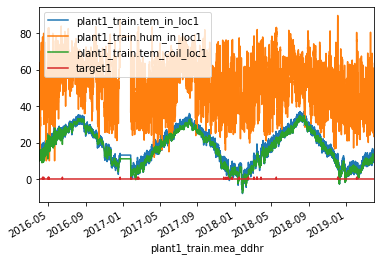

In [16]:
df[['plant1_train.tem_in_loc1','plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','target1']]["2016-04":"2019-03"].plot()

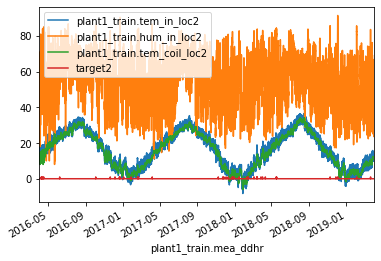

In [17]:
df[['plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','target2']]["2016-04":"2019-03"].plot()

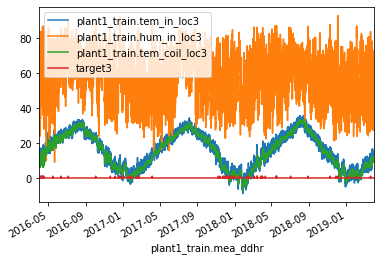

In [18]:
df[['plant1_train.tem_in_loc3','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','target3']]["2016-04":"2019-03"].plot()

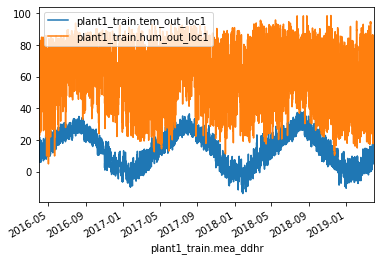

In [19]:
df[['plant1_train.tem_out_loc1','plant1_train.hum_out_loc1']]["2016-04":"2019-03"].plot()

In [20]:
df = df.drop(['target1','target2','target3'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58749 entries, 2016-04-01 00:00:00 to 2019-03-31 23:50:00
Data columns (total 11 columns):
plant1_train.tem_in_loc1      58749 non-null float64
plant1_train.hum_in_loc1      58749 non-null float64
plant1_train.tem_coil_loc1    58749 non-null float64
plant1_train.tem_in_loc2      58749 non-null float64
plant1_train.hum_in_loc2      58749 non-null float64
plant1_train.tem_coil_loc2    58749 non-null float64
plant1_train.tem_in_loc3      58749 non-null float64
plant1_train.hum_in_loc3      58749 non-null float64
plant1_train.tem_coil_loc3    58749 non-null float64
plant1_train.tem_out_loc1     58749 non-null float64
plant1_train.hum_out_loc1     58749 non-null float64
dtypes: float64(11)
memory usage: 7.9 MB


In [22]:
target_names = ['plant1_train.tem_in_loc1', 'plant1_train.hum_in_loc1', 'plant1_train.tem_coil_loc1']

In [23]:
shift_days = 1
shift_steps = shift_days * 24

In [24]:
df_targets = df[target_names].shift(-shift_steps)

In [25]:
df[target_names].head(shift_steps + 5)

,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1
plant1_train.mea_ddhr,,,
2016-04-01 00:00:00,16.0,24.0,11.0
2016-04-01 03:00:00,14.0,28.0,10.0
2016-04-01 06:00:00,13.0,33.0,10.0
2016-04-01 09:00:00,13.0,33.0,10.0
2016-04-01 12:00:00,16.0,28.0,10.0
2016-04-01 15:00:00,18.0,24.0,14.0
2016-04-01 18:00:00,17.0,28.0,14.0
2016-04-01 21:00:00,16.0,38.0,12.0
2016-04-02 00:00:00,15.0,41.0,12.0


In [26]:
df_targets.head(5)

,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1
plant1_train.mea_ddhr,,,
2016-04-01 00:00:00,15.0,28.0,11.0
2016-04-01 03:00:00,14.0,30.0,12.0
2016-04-01 06:00:00,13.0,37.0,11.0
2016-04-01 09:00:00,13.0,42.0,11.0
2016-04-01 12:00:00,17.0,26.0,14.0


In [27]:
df_targets.tail()

,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1
plant1_train.mea_ddhr,,,
2019-03-31 23:10:00,NaN,NaN,NaN
2019-03-31 23:20:00,NaN,NaN,NaN
2019-03-31 23:30:00,NaN,NaN,NaN
2019-03-31 23:40:00,NaN,NaN,NaN
2019-03-31 23:50:00,NaN,NaN,NaN


In [28]:
x_data = df.values[0:-shift_steps]

In [29]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (58725, 11)


In [30]:
y_data = df_targets.values[:-shift_steps]

In [31]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (58725, 3)


In [32]:
num_data = len(x_data)
num_data

58725

In [33]:
train_split = 0.9

In [34]:
num_train = int(train_split * num_data)
num_train

52852

In [35]:
num_test = num_data - num_train
num_test

5873

In [36]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

58725

In [37]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

58725

In [38]:
num_x_signals = x_data.shape[1]
num_x_signals

11

In [39]:
num_y_signals = y_data.shape[1]
num_y_signals

3

In [40]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -13.69
Max: 98.69


In [41]:
x_scaler = MinMaxScaler()

In [42]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [43]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [44]:
x_test_scaled = x_scaler.transform(x_test)

In [45]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(52852, 11)
(52852, 3)


In [54]:
def batch_generator(batch_size, sequence_length):
 
 #Generator function for creating random batches of training-data.
 
 # Infinite loop.
    while True:
 # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
 # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
 # Fill the batch with random sequences of data.
        for i in range(batch_size):
 # Get a random start-index.
 # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)

 # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]

        yield (x_batch, y_batch)

In [55]:
batch_size = 256

In [56]:
"""
우리는 1344의 sequence-length를 사용할 것입니다. 이것은 각각의 무작위 순서가 8주 동안의 관찰을 포함한다는 것을 의
미합니다. 하나의 단계는 1시간에 해당하므로 24 x 7 시간 간격이 일주일에 해당하고 24 x 7 x 8은 8주에 해당합니다.
"""

sequence_length = 24 * 7 * 8
sequence_length

1344

In [57]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [58]:
x_batch, y_batch = next(generator)

In [59]:
"""
이것은 우리에게 256개 시퀀스의 무작위 배치를 제공합니다. 각 시퀀스에는 1344개의 관측치가 있고 각 관측치에는 20개의
입력 신호와 3개의 출력 신호가 있습니다.
"""

print(x_batch.shape)
print(y_batch.shape)

(256, 1344, 11)
(256, 1344, 3)


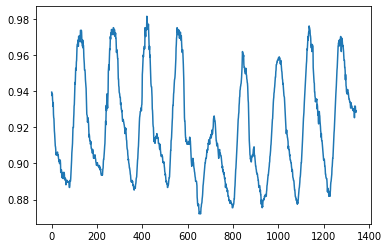

In [60]:
# 입력신호 중 하나 그래프
batch = 0 # First sequence in the batch.
signal = 0 # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

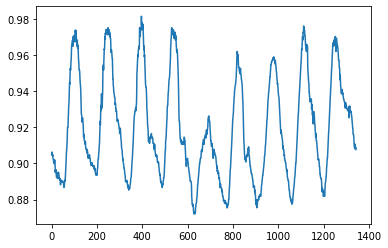

In [61]:
# 출력신호 중 하나 그래프
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [62]:
"""
이 신경망은 학습 시간이 길지 않으므로 많은 학습 에포크를 수행해 볼 수 있습니다. 하지만, 그렇게 하면 오버피팅이 발생해
서 처음 보는 데이터에 대한 예측에 실패할 가능성이 있습니다. 따라서 각 에포크 후에 테스트 세트에서 모델의 성능을 모니터
링하고 테스트 세트에서 성능이 향상되는 경우에만 모델의 가중치를 저장합니다.
배치 생성기는 학습 데이터에서 짧은 시퀀스의 배치를 무작위로 선택하여 학습에 사용합니다. 그러나 유효성 검사 데이터의
경우에는 테스트 세트의 전체 시퀀스를 실행하고 해당 전체 시퀀스의 예측 정확도를 측정합니다
"""


validation_data = (np.expand_dims(x_test_scaled, axis=0),
                    np.expand_dims(y_test_scaled, axis=0))


# 순환 신경망(RNN) 만들기

In [63]:
model = Sequential()

In [64]:
model.add(GRU(units=512,
        return_sequences=True,
        input_shape=(None, num_x_signals,)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [65]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [66]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform
    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)
    model.add(Dense(num_y_signals,
                    activation='linear', kernel_initializer=init))

In [68]:
warmup_steps = 50

In [70]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.

    y_true is the desired output.
    y_pred is the model's output.
    """
 # The shape of both input tensors are:
 # [batch_size, sequence_length, num_y_signals].
 # Ignore the "warmup" parts of the sequences
 # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]
 # These sliced tensors both have this shape:
 # [batch_size, sequence_length - warmup_steps, num_y_signals]
 # Calculate the MSE loss for each value in these tensors.
 # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)
 # Keras may reduce this across the first axis (the batch)
 # but the semantics are unclear, so to be sure we use
 # the loss across the entire tensor, we reduce it to a
 # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [71]:
optimizer = RMSprop(lr=1e-3)

In [72]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         804864    
_________________________________________________________________
dense (Dense)                (None, None, 3)           1539      
Total params: 806,403
Trainable params: 806,403
Non-trainable params: 0
_________________________________________________________________


# Callback Functions
학습을 하는 동안 우리는 체크포인트를 저장하고 진행상황을 TensorBoard에 기록하기 위해서 Keras에 적절한 콜백을 제공
합니다.
이것은 학습 중에 체크포인트를 기록하는 콜백입니다.

In [74]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                    monitor='val_loss',verbose=1,save_weights_only=True,save_best_only=True)

In [75]:
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [76]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/', histogram_freq=0, write_graph=False)

In [77]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=1e-4, patience=0, verbose=1)

In [78]:
callbacks = [callback_early_stopping, callback_checkpoint, callback_tensorboard, callback_reduce_lr]

In [80]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [81]:
%%time
model.fit_generator(generator=generator,
                    epochs=1, #20
                    steps_per_epoch=1, #100
                    validation_data=validation_data,
                    callbacks=callbacks)


Epoch 00001: val_loss improved from inf to 0.02206, saving model to 23_checkpoint.keras
1/1 [==============================] - 173s 173s/step - loss: 0.0347 - val_loss: 0.0221
Wall time: 2min 52s


In [82]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

# 테스트 세트에 대한 성능

In [83]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 15s 15s/sample - loss: 0.0221


In [84]:
print("loss (test-set):", result)

loss (test-set): 0.02206435427069664


In [86]:
# 만약 여러가지 측정치를 사용한다면 다음의 방법으로 측정할 수 있습니다.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

# 예측값을 만들기

In [97]:
def plot_comparison(start_idx, length=100, train=True):

#Plot the predicted and true output-signals.

#param start_idx: Start-index for the time-series.
#:param length: Sequence-length to process and plot.
#:param train: Boolean whether to use training- or test-set.

    if train:
 # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
 # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]

    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)
    
    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    
    
    
    # For each output-signal.
    for signal in range(len(target_names)):
 # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]

 # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]
 # Make the plotting-canvas bigger.
        plt.figure(plot_comparisofigsize=(15,5))

 # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')

 # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)

 # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()